In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from sdclane import config, utility, camera, line_detection, lane_detection


import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [4]:
test_imgs = utility.read_rgb_imgs(config.test_img_files)

In [5]:
lane_detector = lane_detection.LaneDetector()

In [6]:
def process_image(image):
    (l_curvature, r_curvature, offset), marked_lane_img = lane_detector.detect_image(image)
    return marked_lane_img

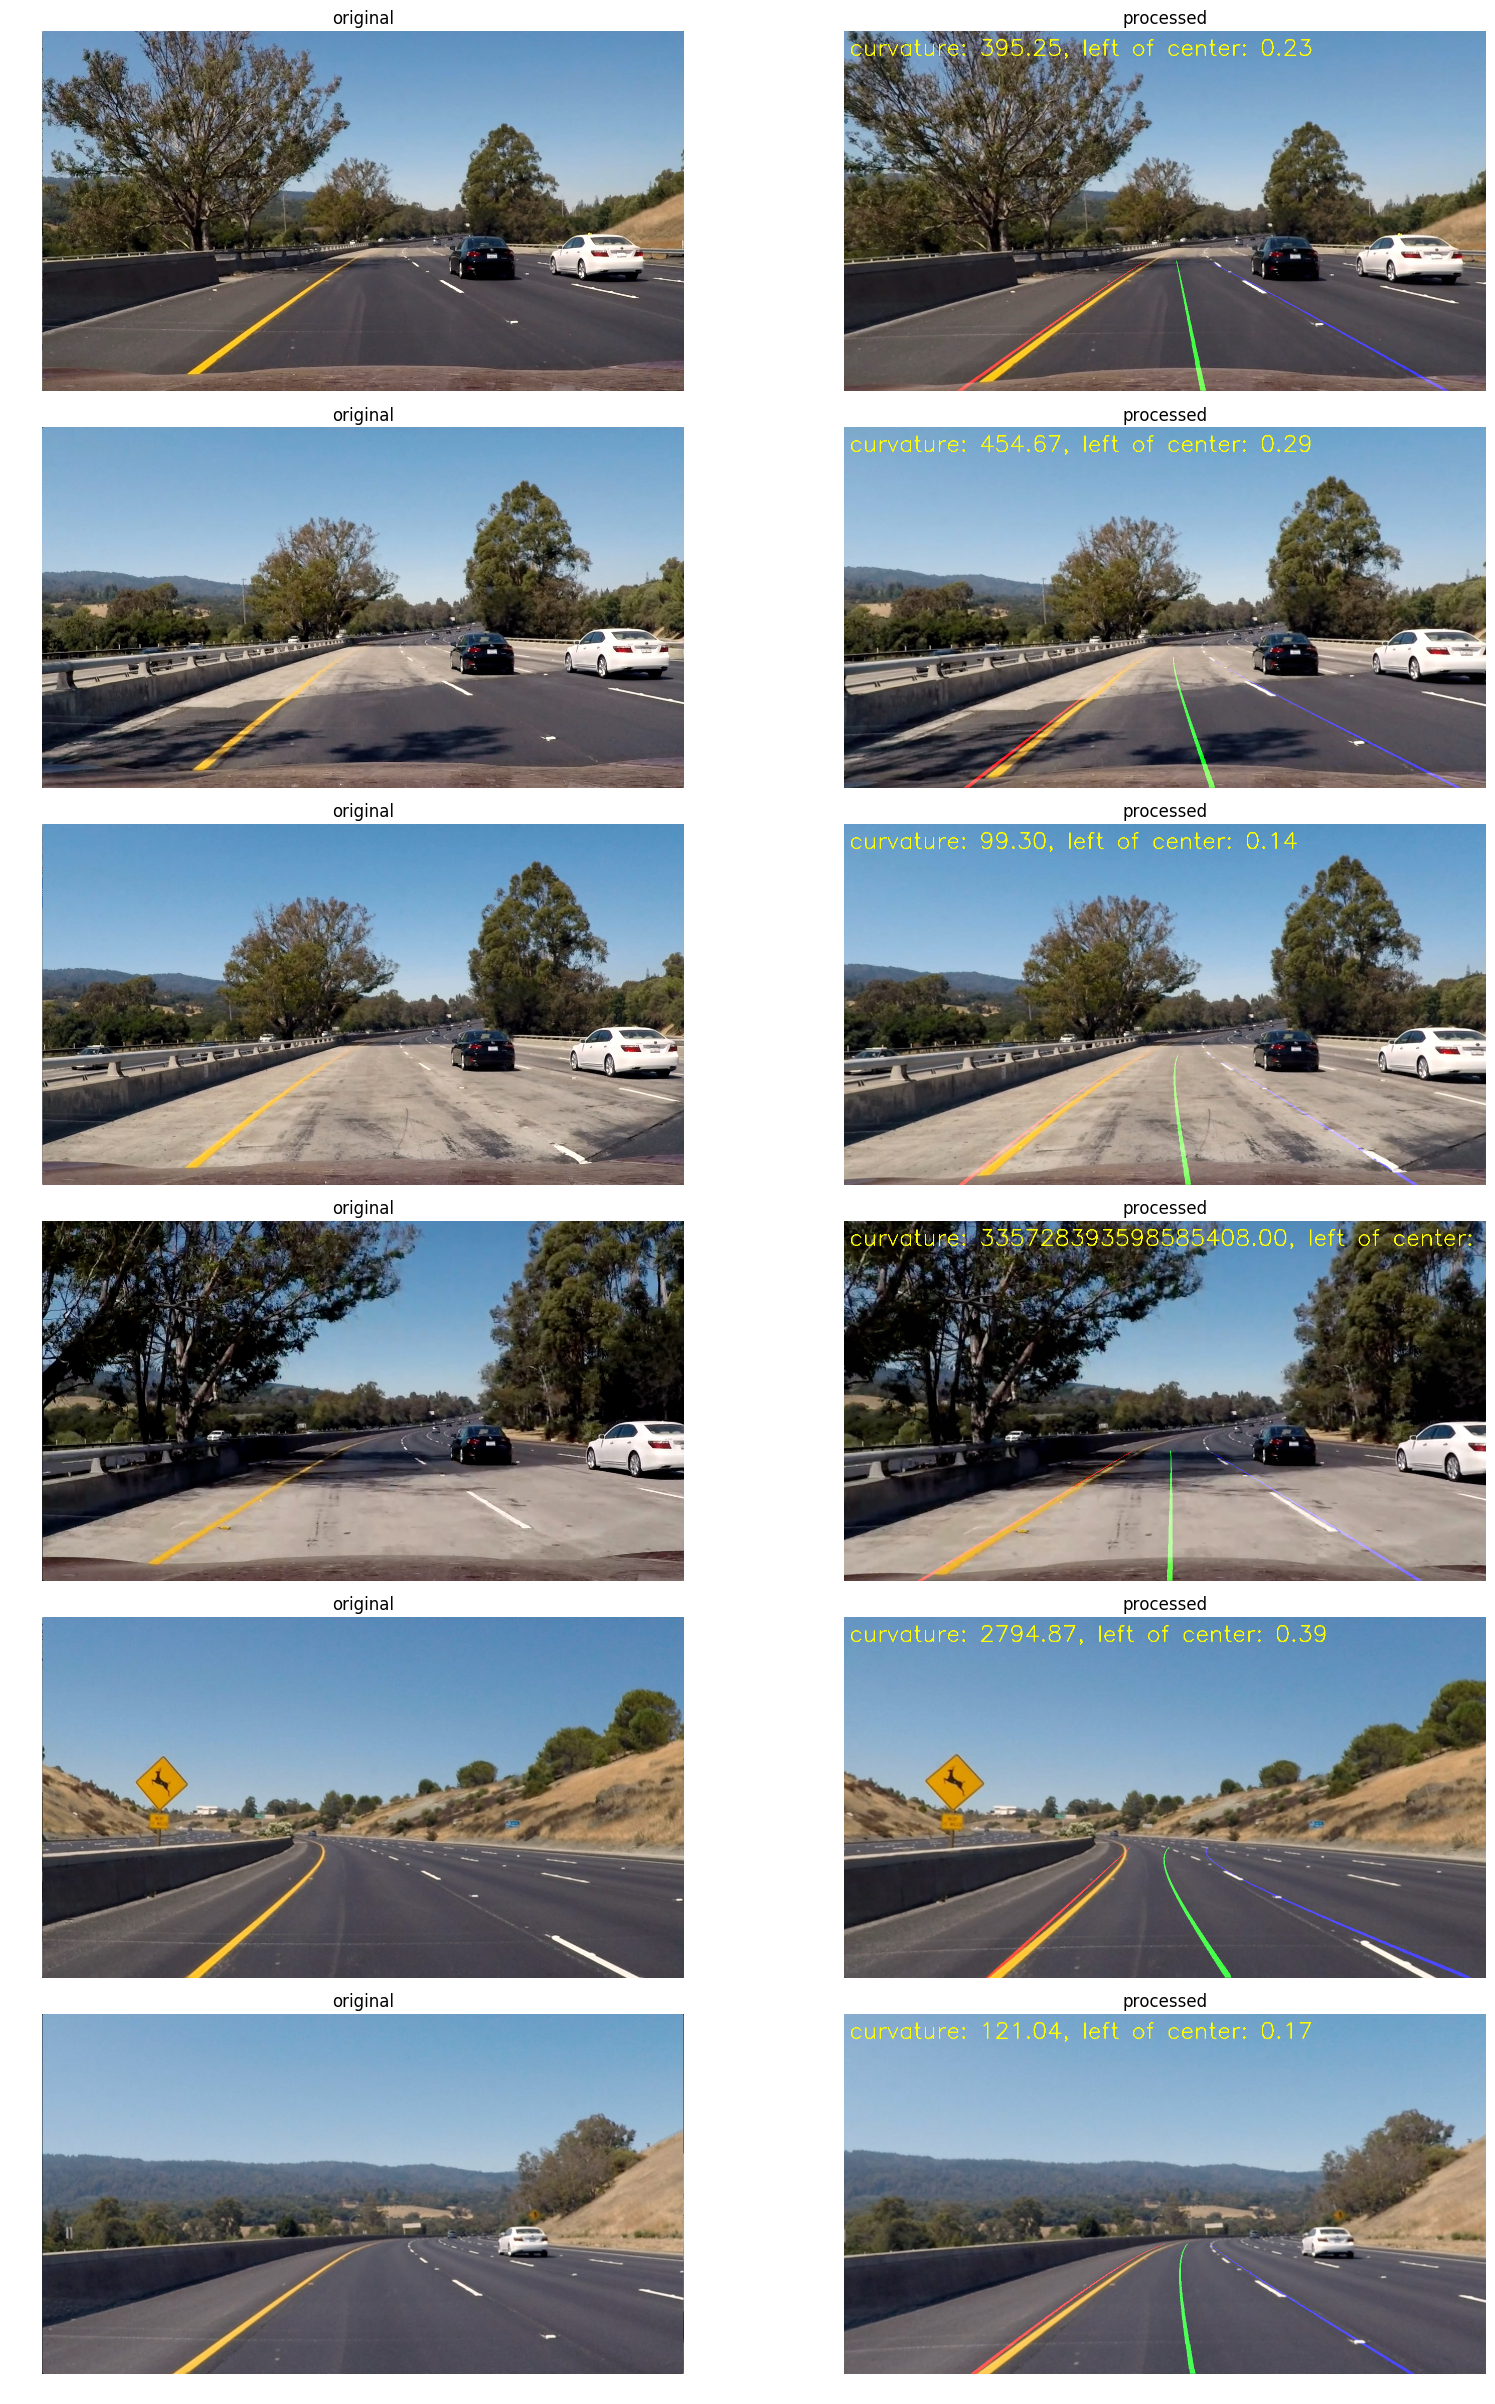

In [7]:
fig, axes = plt.subplots(6, 2, figsize = (8*2, 4*6))
fig.tight_layout()
fig.subplots_adjust(wspace = 0.1, hspace=0.1, )


for ax, test_img in zip(axes, test_imgs):
    ax[0].imshow(test_img)
    ax[0].set_axis_off()
    ax[0].set_title("original")
    
    ax[1].imshow(process_image(test_img))
    ax[1].set_axis_off()
    ax[1].set_title("processed")

In [8]:

clip_output_file = 'marked_challenge_video.mp4'
clip = VideoFileClip("challenge_video.mp4")
clip_output = clip.fl_image(process_image) 
%time clip_output.write_videofile(clip_output_file, audio=False)

[MoviePy] >>>> Building video marked_challenge_video.mp4
[MoviePy] Writing video marked_challenge_video.mp4


100%|██████████| 485/485 [02:25<00:00,  3.37it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: marked_challenge_video.mp4 

CPU times: user 17min 10s, sys: 40.3 s, total: 17min 50s
Wall time: 2min 26s


In [9]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format('marked_challenge_video.mp4'))

In [10]:

clip_output_file = 'marked_project_video.mp4'
clip = VideoFileClip("project_video.mp4").subclip(0, 10)
clip_output = clip.fl_image(process_image) #NOTE: this function expects color images!!
%time clip_output.write_videofile(clip_output_file, audio=False)

[MoviePy] >>>> Building video marked_project_video.mp4
[MoviePy] Writing video marked_project_video.mp4


100%|█████████▉| 250/251 [01:15<00:00,  3.42it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: marked_project_video.mp4 

CPU times: user 9min 3s, sys: 20.8 s, total: 9min 24s
Wall time: 1min 16s


In [11]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format('marked_project_video.mp4'))

In [ ]:
clip_output_file = 'marked_harder_challenge_video.mp4'
clip = VideoFileClip("harder_challenge_video.mp4")
clip_output = clip.fl_image(process_image) #NOTE: this function expects color images!!
%time clip_output.write_videofile(clip_output_file, audio=False)

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format('marked_harder_challenge_video.mp4'))